In [2]:
%matplotlib inline

# Georice

Georice processor creates classified maps of the presence of rice fields based on Sentinel 1A and Sentinel 1B imagery. Classification script was creted by CNES.
Sentinel 1 scenes are acquired from [Sentinel-hub](https://www.sentinel-hub.com/). Processor can not be used without
specifying  of Sentinel hub credentials:
* client_id
* client_secret
* instance_id

Instance ID refers to Sentinel Hub configuration with Sentinal 1A and Sentinal 1B VH/VV scenes

User specific Sentinel Hub credentials are automatically injected as enviromental variable.

In [ ]:
# load credentials from environment variables
%load_ext dotenv
%dotenv

Import of Georice proccesor

In [3]:
from georice import Georice

Other libraries

In [4]:
import shapely.geometry
import IPython.display
import matplotlib.pyplot as plt
from matplotlib import colors
from sentinelhub import BBox

Inicialization of processor

In [5]:
task = Georice()

SentinelHub credential as environmental variable SH_CLIENT_ID was not found. Set credential sh_client_id manualy
SentinelHub credential as environmental variable SH_CLIENT_SECRET was not found. Set credential sh_client_secret manualy
SentinelHub credential as environmental variable SH_INSTANCE_ID was not found. Set credential instance_id manualy


Sentinel hub credentials are automatically saved into Sentinel Hub config. In the case of changing or if some of credential missing i.e instance ID, Credentials can be set manually with et_credentials method.

In [35]:
sh_credentials = dict(sh_client_id='your client id',
                      sh_client_secret='your client secret',
                      instance_id='your instance id')

task.set_credentials(**sh_credentials)

sh_client_id : your client id was set into SHConfig
sh_client_secret : your client secret was set into SHConfig
instance_id : your instance id was set into SHConfig


Setting of Area of Interest and period:

In [6]:
bbox = 512105.6280661971541122, 1194410.5953210531733930, 530309.7550376804429106, 1207661.2870531221851707
epsg = 32648
name = 'AOI2'
period = ('20180404', '20180504')

In [7]:
IPython.display.GeoJSON(BBox(bbox,crs=epsg).transform(4326).get_geojson())

<IPython.display.GeoJSON object>

Finding scense for given bbox and period

In [13]:
task.find_scenes(bbox=bbox,
                 epsg=epsg,
                 period=period)

10 were found for period 2018-04-04T00:00:00/2018-05-04T00:00:00
0: satellite: S1B, polarization: DV, orbit_number: 018, orbit_path: DES
1: satellite: S1A, polarization: DV, orbit_number: 026, orbit_path: ASC
2: satellite: S1A, polarization: DV, orbit_number: 018, orbit_path: DES
3: satellite: S1A, polarization: DV, orbit_number: 018, orbit_path: DES
4: satellite: S1B, polarization: DV, orbit_number: 018, orbit_path: DES
5: satellite: S1A, polarization: DV, orbit_number: 026, orbit_path: ASC
6: satellite: S1A, polarization: DV, orbit_number: 026, orbit_path: ASC
7: satellite: S1A, polarization: DV, orbit_number: 018, orbit_path: DES
8: satellite: S1A, polarization: DV, orbit_number: 018, orbit_path: DES
9: satellite: S1B, polarization: DV, orbit_number: 018, orbit_path: DES


To generate rice map is needed to select "orbit_numuber" and "orbit_path". Rice map is generated by calling get_ricemap method. 

Each scene is processed on Sentinel-Hub with Gamma 0 Backscatter Coefficient and scenes are orthorectified. On each scene is applied SAR multi-temporal speckle filter if method argument filtering=True (default)

Info about more processing parameters can be found at help(Georice.ricemap_get)

In [14]:
task.get_ricemap(name, period, orbit_number='018', orbit_path='DES')

Compute outcore... 0%
Compute outcore... 100%
Compute filtered images... 0%
Compute filtered images... 100%
Rice map was downloaded into /root/output/AOI2/ricemaps


Acces of scenes. 

Georice class search automatically output folder specified in the config and create attributes associated with names of folders with files. Through these attributes can be accessed downloaded scenes and also specific folder cand be deleted by function delete(). List of valible attributes/folder can be given by:

In [15]:
task.tiles()

['AOI2']

List of subfolders for specific tiles can be invoked by:

In [16]:
task.AOI2()

['ricemaps']

List of rasters in specyfic subfolders invoked by:

In [18]:
task.AOI2.ricemaps()

['ricemap_AOI2_DES_018_20180404_20180504.tif']

Each raster scene/rice map has function plot,array and delete. First invoke pyplot.imgshow and second return numpy array and last delete the scene/rice map. Function delete can be also used for whole folder.

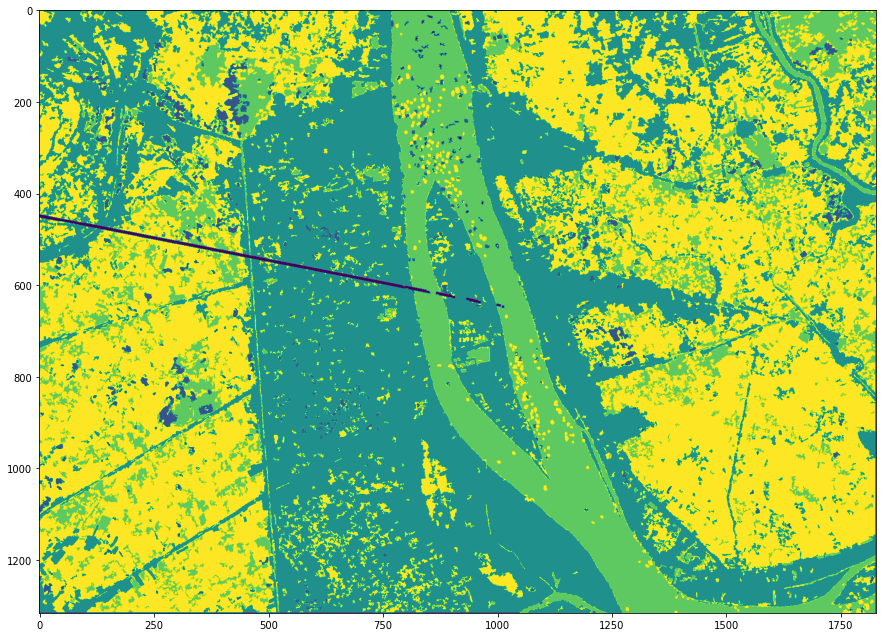

In [21]:
plt.figure(figsize=(15,15))
task.AOI2.ricemaps.ricemap_AOI2_DES_018_20180404_20180504.plot()

In [22]:
task.AOI2.ricemaps.ricemap_AOI2_DES_018_20180404_20180504.array()

array([[4, 4, 4, ..., 0, 0, 0],
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 3, 3, 0],
       [2, 2, 2, ..., 3, 3, 0],
       [0, 0, 0, ..., 3, 3, 0]], dtype=uint8)

Path, where the raster is located, can be invoked via attribute path

In [27]:
task.AOI2.ricemaps.ricemap_AOI2_DES_018_20180404_20180504.path

'/root/output/AOI2/ricemaps/ricemap_AOI2_DES_018_20180404_20180504.tif'

Rice map visualization

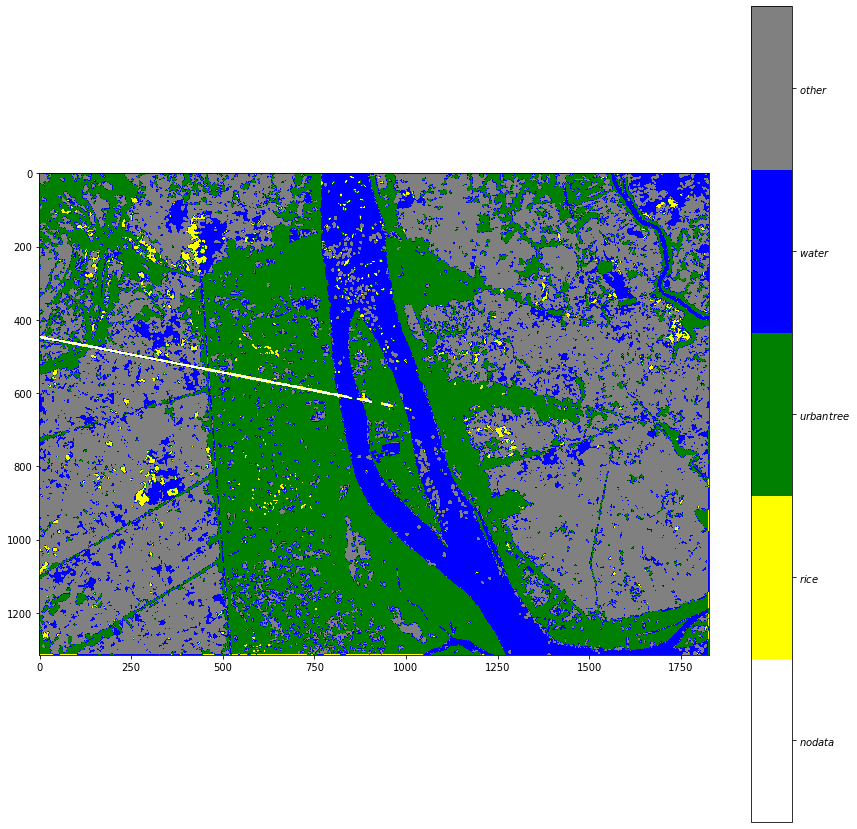

In [26]:
cmap = colors.ListedColormap(['white', 'yellow', 'green', 'blue', 'gray'])
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(15,15))

task.AOI2.ricemaps.ricemap_AOI2_DES_018_20180404_20180504.plot(cmap=cmap)

cbar = plt.colorbar( boundaries=bounds)
cbar.set_ticks([0, 1, 2, 3, 4])
cbar.set_ticklabels(['$nodata$','$rice$','$urbantree$','$water$', '$other$'])